   ### SUMMARY :

   <pre>
Created By        : Jahid Khan
    
Project Name      : Detection of Pneumonia from Chest X-Ray Images using Convolutional Neural Network and Deep Learning.
    
Description       : 1. Using Convolutional Neural Network and Deep Laerning on 700 images of two sets (Pneumonia,Normal). 
                        2. By using this Model I got Accuracy- and Loss-  .
       
Methods           :
       
Tools/Library     : Kaggle, keras, tensorflow, sklearn, pydotplus, numpy, liveloseplot

Dataset           :         
   <pre>                      
Dataset Name     : Chest X-Ray Images (Pneumonia)                   
Dataset Link     : <a href=https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia>Chest X-Ray Images (Pneumonia) Dataset (Kaggle)</a>
                 : <a href=https://data.mendeley.com/datasets/rscbjbr9sj/2>Chest X-Ray Images (Pneumonia) Dataset (Original Dataset)</                 a>
Original Paper   : <a href=https://www.cell.com/cell/fulltext/S0092-8674(18)30154-5>Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning</a>
                   (Daniel S. Kermany, Michael Goldbaum, Wenjia Cai, M. Anthony Lewis, Huimin Xia, Kang Zhang)
                   https://www.cell.com/cell/fulltext/S0092-8674(18)30    154-5

</pr  <pre>

In [1]:
# importing Libray--->

import os
import kaggle
import zipfile as std_zip
import cv2
import numpy as np
import tensorflow as tf
import sklearn
import pydotplus


In [2]:

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from IPython.display import display, SVG
from tensorflow.keras.utils import model_to_dot


In [3]:
# using liveloseplot for live graph performance ---->

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS =25


In [4]:
# locating kaggle id--->

os.environ['KAGGLE_USERNAME']="jahidkhancheeta"
os.environ['KAGGLE_KEY']="eefd3620cb73778af44a8f5a96bd0068"


In [5]:
#!kaggle datasets download "paultimothymooney/chest-xray-pneumonia"

In [6]:

#zip_file_path = r"C:\Users\codew\Documents\PROGRAMMING\JUPYTER\chest-xray-pneumonia.zip"
#extract_path = r"C:\Users\codew\Documents\PROGRAMMING\JUPYTER\kaggle datasets"

#with std_zip.ZipFile(zip_file_path, 'r') as zip_ref:
#    zip_ref.extractall(extract_path)
    

In [7]:
# creating loadimages function--->

def loadImages(path, urls, target, desired_size):
    images=[]
    labels=[]
    
    for url in urls:
        img_path = os.path.join(path, url)
        img = cv2.imread(img_path)
        img = cv2.resize(img, desired_size)
        images.append(img)
        labels.append(target)
        
    return  images, labels
    

In [8]:
pneu_path= 'C:\\Users\\codew\\Documents\\PROGRAMMING\\JUPYTER\\kaggle datasets\\chest_xray\\test\\PNEUMONIA'

pneu_urls=  os.listdir(pneu_path)

pneuImages , pneuTargets = loadImages(pneu_path, pneu_urls, 1, (156, 156))

In [9]:
nor_path= 'C:\\Users\\codew\\Documents\\PROGRAMMING\\JUPYTER\\kaggle datasets\\chest_xray\\test\\NORMAL'

nor_urls=  os.listdir(nor_path)

norImages , norTargets=loadImages(nor_path, nor_urls, 0, (156, 156))

In [10]:
def data_summary(x_train, x_test, y_train, y_test):
    """Sumarize current state of dataset"""
    print('train images shape:', x_train.shape)
    print('train labels shape:', y_train.shape)
    print('test images shape:', x_test.shape)
    print('test labels shape:', y_test.shape)
    print('train labels', y_train)
    print('test labels', y_test)

In [11]:
#convert target and imagses in array beacuse of list form of return images and labels as normal and pneumonia separately--->
    
data = np.r_[pneuImages, norImages]
targets = np.r_[pneuTargets, norTargets]
data = data/255.0


In [12]:
# load data & create train_test ---->

x_train,x_test,y_train,y_test = train_test_split(data, targets,test_size=0.4)


In [13]:
# Categorical encode labels--->

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


In [14]:
# Check state of dataset---->

data_summary(x_train,x_test,y_train,y_test)


train images shape: (374, 156, 156, 3)
train labels shape: (374, 10)
test images shape: (250, 156, 156, 3)
test labels shape: (250, 10)
train labels [[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
test labels [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [15]:
# creating model---->

model = Sequential()

# Adjust the input shape to match your image size
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(156, 156, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [16]:
# Compile the model--->

learning_rate=0.1
adam = keras.optimizers.Adam(learning_rate)
#rmsprop = keras.optimizers.rmsprop(lr=learning_rate)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


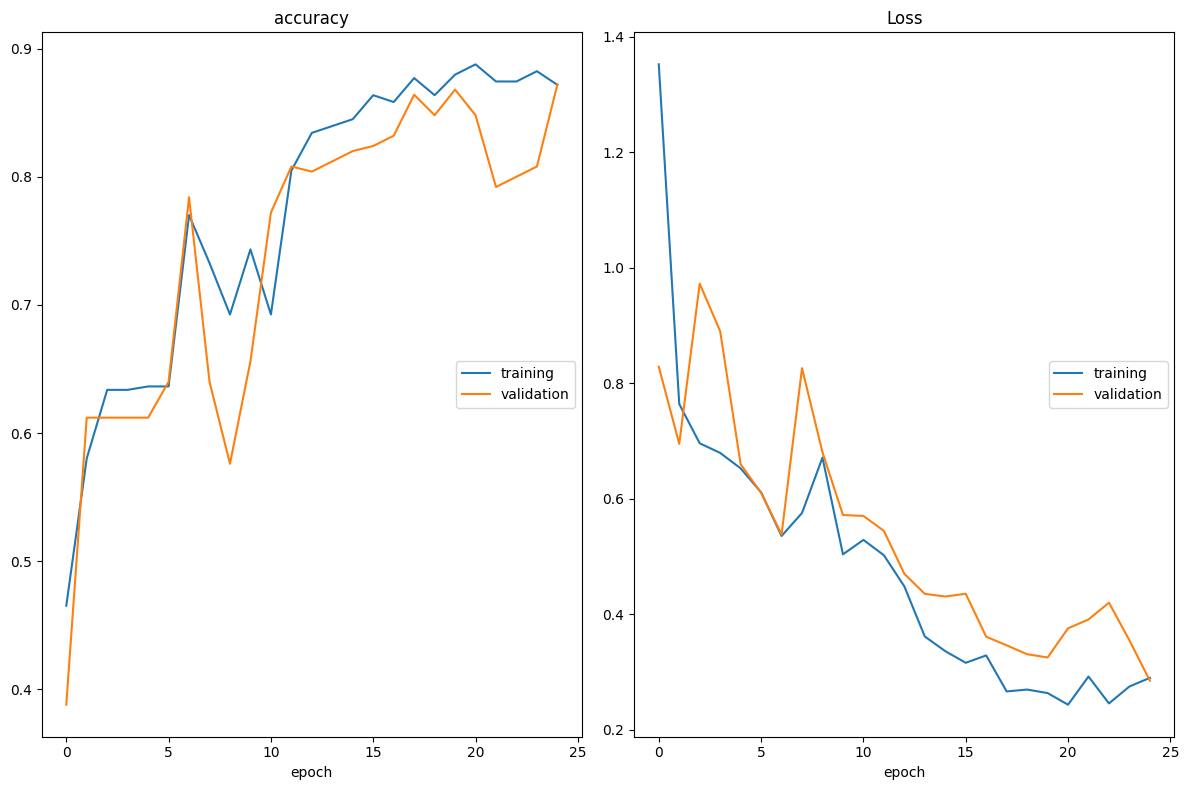

accuracy
	training         	 (min:    0.465, max:    0.888, cur:    0.872)
	validation       	 (min:    0.388, max:    0.872, cur:    0.872)
Loss
	training         	 (min:    0.243, max:    1.352, cur:    0.290)
	validation       	 (min:    0.285, max:    0.972, cur:    0.285)
3/3 [==============================] - 14s 5s/step - loss: 0.2896 - accuracy: 0.8717 - val_loss: 0.2847 - val_accuracy: 0.8720
Test loss: 0.28469234704971313
Test accuracy: 0.871999979019165


In [17]:
# train model--->

model.fit(x_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose = 1,
          callbacks = [plot_losses],
          validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [18]:
# Summary of nerural network ---->

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 154, 154, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 77, 77, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 16)       0

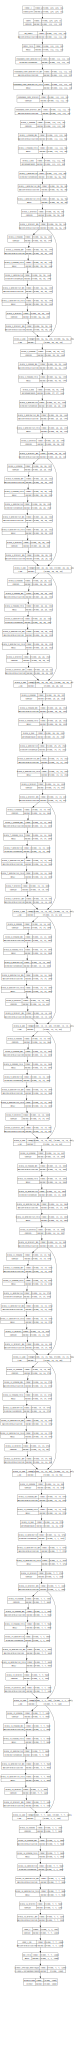

In [19]:
# output network visualization

# Load or create your Keras/TF model
model = tf.keras.applications.MobileNetV2()  # Replace with your model

# Create the dot representation of the model
dot = model_to_dot(model, show_shapes=True, show_layer_names=True)

# Set the Graphviz attributes
dot.set_dpi(70)                  # Adjust the dpi value as needed
dot.set_size('"350,450"')        # Adjust the size values as needed

# Convert the PyDotPlus object to SVG
svg_rep = dot.create(format='svg')

display(SVG(svg_rep))
